In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context("talk")

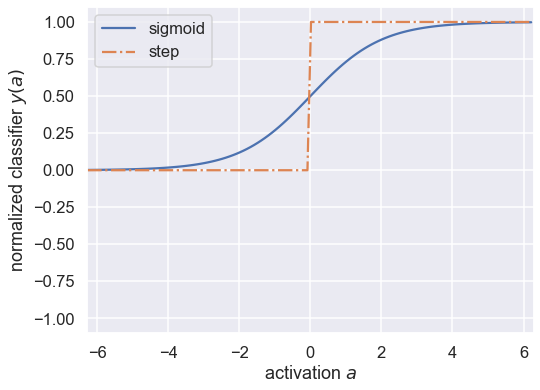

In [2]:
a = np.arange(-2*np.pi, 2*np.pi, .1)
sigma_fn = np.vectorize(lambda a: 1/(1+np.exp(-a)))
sigma = sigma_fn(a)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(a, sigma, label='sigmoid')

# Step Function
step_fn = np.vectorize(lambda a: 1.0 if a >= 0.0 else 0.0)
step = step_fn(a)
ax.plot(a, step, '-.', label='step')

ax.set_ylim([-1.1, 1.1])
ax.set_xlim([-2*np.pi,2*np.pi])
ax.set_ylabel('normalized classifier $y(a)$')
ax.set_xlabel(r'activation $a$')
ax.legend(loc='best');

In [3]:
from sklearn import datasets, linear_model

In [4]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=1.20)

In [5]:
X.shape

(200, 2)

In [6]:
y.shape

(200,)

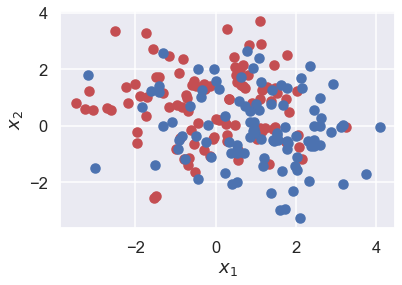

In [7]:
fig,ax=plt.subplots(1,1)
ax.scatter(X[y==0,0],X[y==0,1],c='r')
ax.scatter(X[y==1,0],X[y==1,1],c='b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');

In [8]:
clf = linear_model.LogisticRegressionCV(cv=5,penalty='l2')
clf.fit(X, y)

LogisticRegressionCV(cv=5)

In [9]:
clf.coef_

array([[ 0.18505795, -0.14192397]])

In [10]:
clf.intercept_

array([-0.03432889])

In [11]:
# Helper functions to visualize the data and the decision boundary
#
def visualize(X, y, clf,ax=[]):
    plot_decision_boundary(lambda x: clf.predict(x), X, y, ax=ax)

def plot_decision_boundary(pred_func, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx0.ravel(), xx1.ravel()])
    Z = Z.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, Z, cmap=plt.cm.RdBu, alpha=0.2)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, Z, cmap=plt.cm.RdBu, alpha=0.2)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

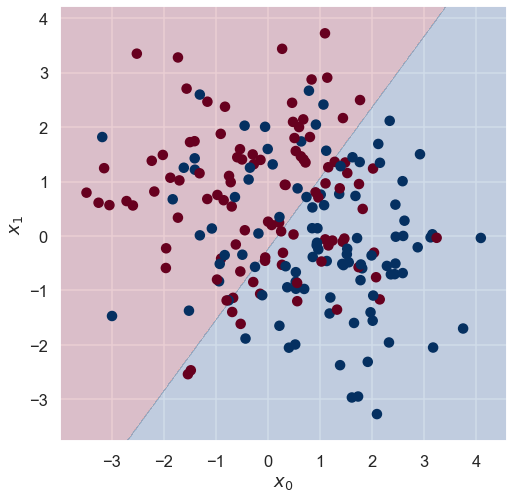

In [12]:
fig,ax = plt.subplots(figsize=(8,8))
visualize(X, y, clf,ax)
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$');

In [13]:
def sigmoid(a):
    '''
    Sigmoid activation function
    
    Args:
        a (array[float]): activation signal
        
    Returns:
        y (float): the output of the neuron
    '''
    # Add code here (remove the dummy lines)
    y = None
    return y

def single_neuron(x, w):
    """
    Single neuron prediction. 
    
    Args:
        x (array[float]): input to the neuron
        w (array[float]):

    Returns:
        y (float): the output of the neuron
    """
    if len(np.array([x1[0],x2[1]]).shape)==1:
        x = np.append(1, x)
    else:
        m = len(x)
        x = np.c_[np.ones((m, 1)), x] 
    assert(len(w)==x.shape[-1])

    a = np.dot(x,w)
    return sigmoid(a)

def single_neuron_binary_classifier(x, t, iters=10000, alpha=0.1, eta0=0.01):
    """
    Makes predictions for a single neuron binary classifier
    
    Args:
        x (array[float]): an array of input data
        t (float): target output for each data points
        iters (int): number of iterations to apply gradient descent
        alpha (float): a rescaling parameter for the weights
        eta (float): learning rate
        
    Return
        w (array[float]): the trained weights of the classifier 
    """
    # Insert code here (remove the dummy lines)
    w = None
    return w

In [14]:
# Install TensorFlow by updating the conda environment
# Download the latest version of the environment.yml file
# (with tensorflow on the last line)
# Then run:
# conda env update -f /path/to/environment.yml

import tensorflow as tf